# Introduction

Best results : 94.976 % accuracy

Overview
1. Understanding the data
2. Data Cleaning
3. Data Exploration
4. Feature Engineering
5. Model Building
6. Results

In [1]:
# Importing Necessary Packages...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc

# Setting up plotting prefrences... 
sns.set_context("talk")
sns.set_style('whitegrid')

In [2]:
# loading datasets
dftrain = pd.read_csv('train.csv') # training data
dfeval = pd.read_csv('test.csv') # testing data
y_eval = pd.read_csv('gender_submission.csv') #evaluation data

# Understanding the data

In [3]:
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dftrain.shape

(891, 12)

In [5]:
dftrain.sample(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.000,NaN,S
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.500,A26,C
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.975,NaN,S
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.750,NaN,S
554,555,1,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.775,NaN,S
682,683,0,3,"Olsvigen, Mr. Thor Anderson",male,20.0,0,0,6563,9.225,NaN,S
600,601,1,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.000,NaN,S
743,744,0,3,"McNamee, Mr. Neal",male,24.0,1,0,376566,16.100,NaN,S


>- PassengerId, Name, and Ticket are trivial information
>- Cabin values consists of a characted followed by a number

In [6]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


>- Age, Cabin, and Embarked have missing values
>- PassengerId, and Name columns are trivial

In [7]:
dftrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


>- All numbers seems within the normal range except for the maximum value of fare.

In [8]:
dftrain.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
dftrain.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
C22 C26        3
F33            3
              ..
B37            1
B73            1
C62 C64        1
D48            1
C50            1
Name: Cabin, Length: 147, dtype: int64

# Data Exploration

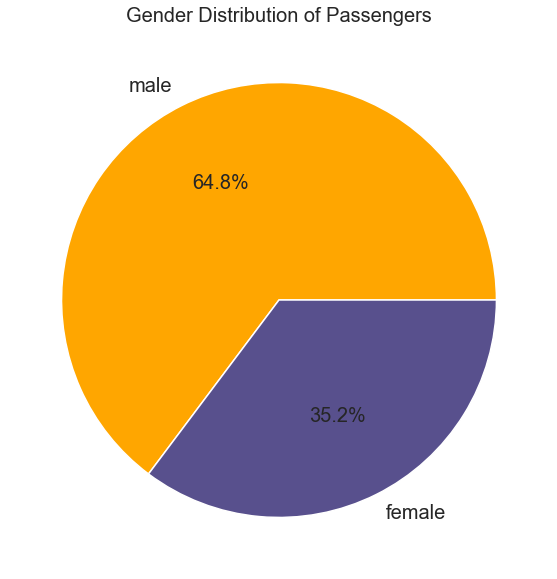

In [10]:
plt.figure(figsize=(10,10))
colors = ['#FFA600','#58508D']#,'#BC5090','#FF6361'
#df.gender.value_counts().plot(kind = 'pie',autopct='%1.1f%%',colors=colors)
plt.pie(dftrain.Sex.value_counts(),colors=colors,autopct='%1.1f%%',labels = dftrain.Sex.value_counts().index,textprops={'fontsize':20})
plt.title("Gender Distribution of Passengers",{'fontsize':20});

> The number of men was about double the number of women

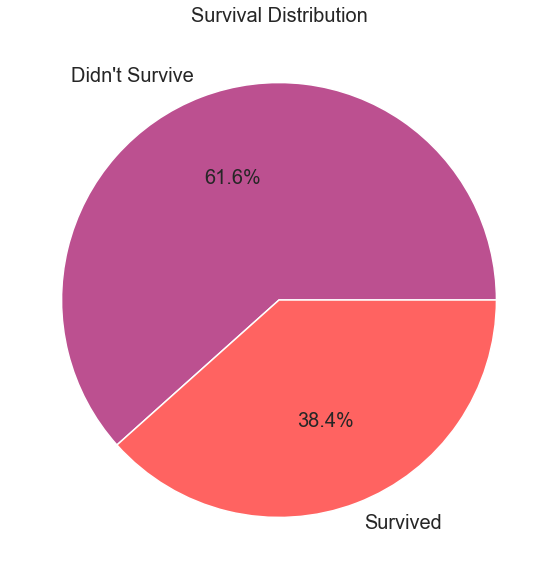

In [11]:
plt.figure(figsize=(10,10))
colors = ['#BC5090','#FF6361']#,'#BC5090','#FF6361'
#df.gender.value_counts().plot(kind = 'pie',autopct='%1.1f%%',colors=colors)
plt.pie(dftrain.Survived.value_counts(),colors=colors,autopct='%1.1f%%',labels = ["Didn't Survive","Survived"],textprops={'fontsize':20})
plt.title("Survival Distribution",{'fontsize':20});

> The chances of survival were low

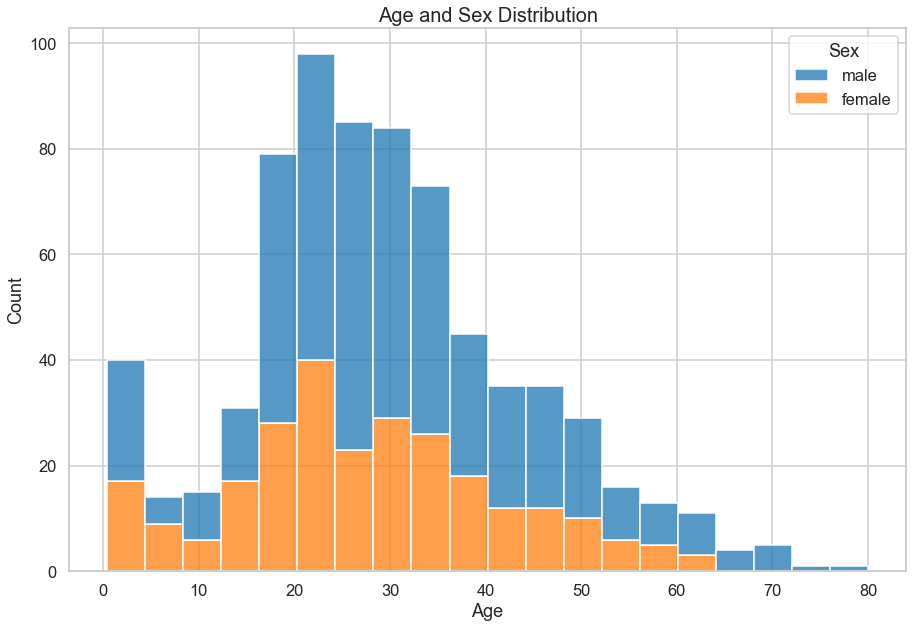

In [12]:
plt.figure(figsize=(15,10))
sns.histplot(data=dftrain,x="Age",hue="Sex",multiple='stack')
plt.title("Age and Sex Distribution",{'fontsize':20});

> Males's count exceeded Females's count in all ages except for the age of 5 years

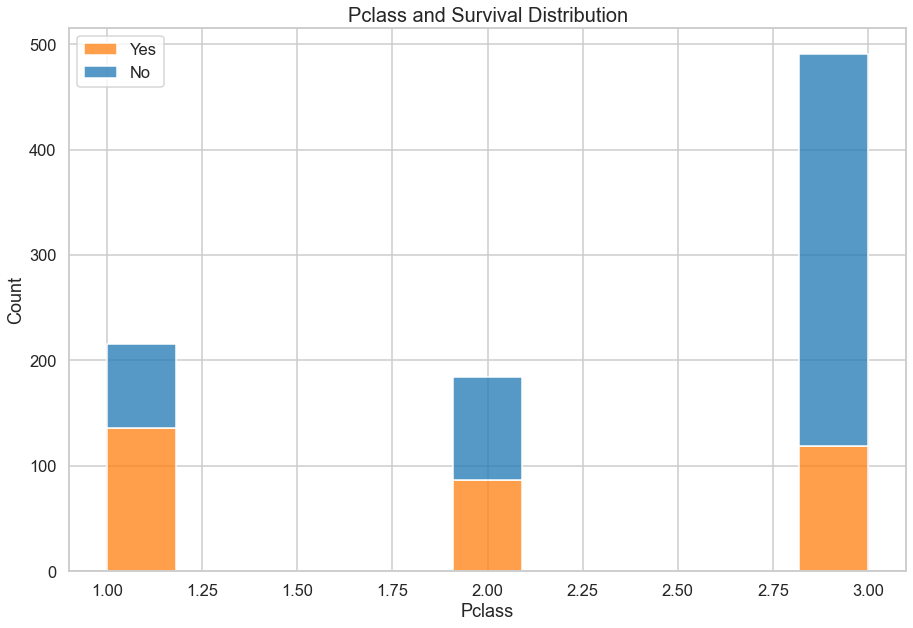

In [13]:
plt.figure(figsize=(15,10))
sns.histplot(data = dftrain, x='Pclass',hue = 'Survived',multiple='stack')
plt.title("Pclass and Survival Distribution",{'fontsize':20});
plt.legend(['Yes','No']);

> There is a very lower chance of survival for those who belong to the third class. First class passengers have the biggest chance of survival.

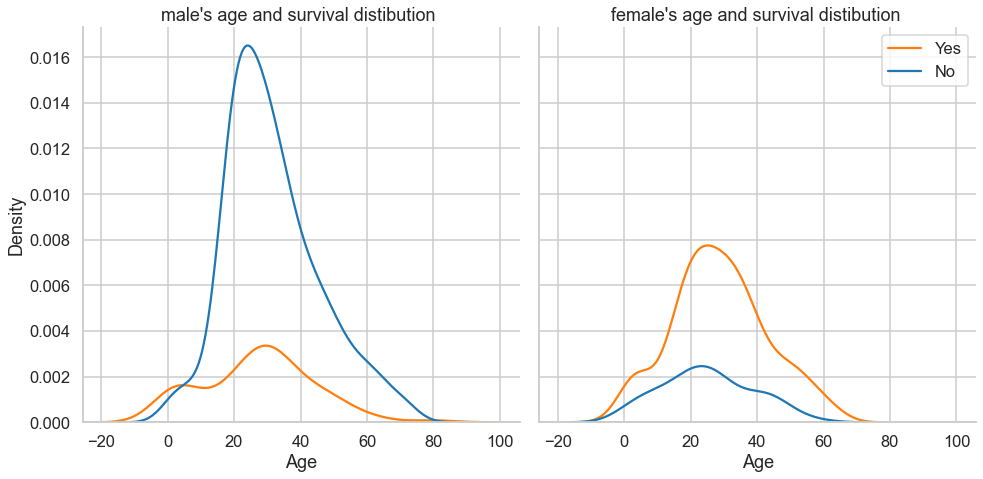

In [14]:
p = sns.displot(data=dftrain, x="Age", hue="Survived",col= "Sex",height = 7, kind="kde",legend = False);
plt.legend(['Yes','No'])
p.set_titles("{col_name}'s age and survival distibution ");

>There is a higher chance to survive in cas you were a child or a female

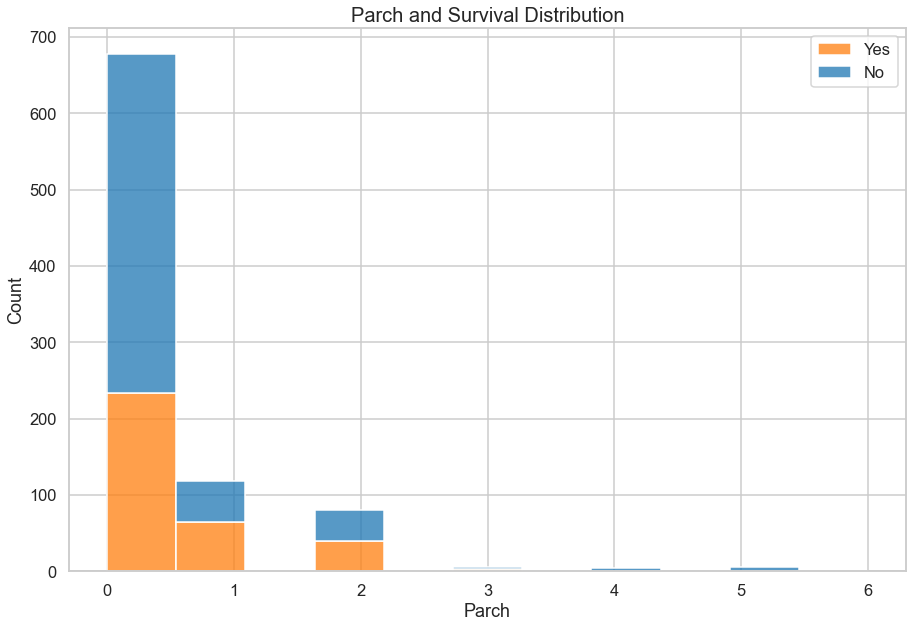

In [15]:
plt.figure(figsize=(15,10))
sns.histplot(data = dftrain, x='Parch',hue = 'Survived',multiple='stack')
plt.title("Parch and Survival Distribution",{'fontsize':20});
plt.legend(['Yes','No']);

>You have a higher chance of survival if you are with family of 1 or 2 people 

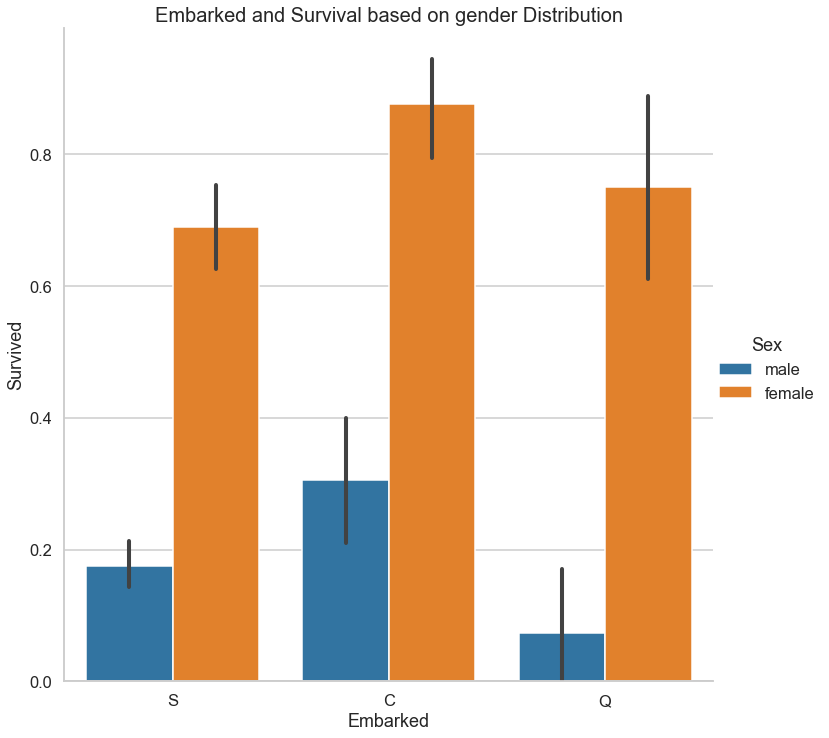

In [16]:
sns.catplot(x="Embarked", y="Survived", hue="Sex", kind="bar", data=dftrain,height=10)
plt.title("Embarked and Survival based on gender Distribution",{'fontsize':20});

> People who empbarked to C have a higher chance of survival than people who embarked to S whose chance is higher than those who embarked in Q.

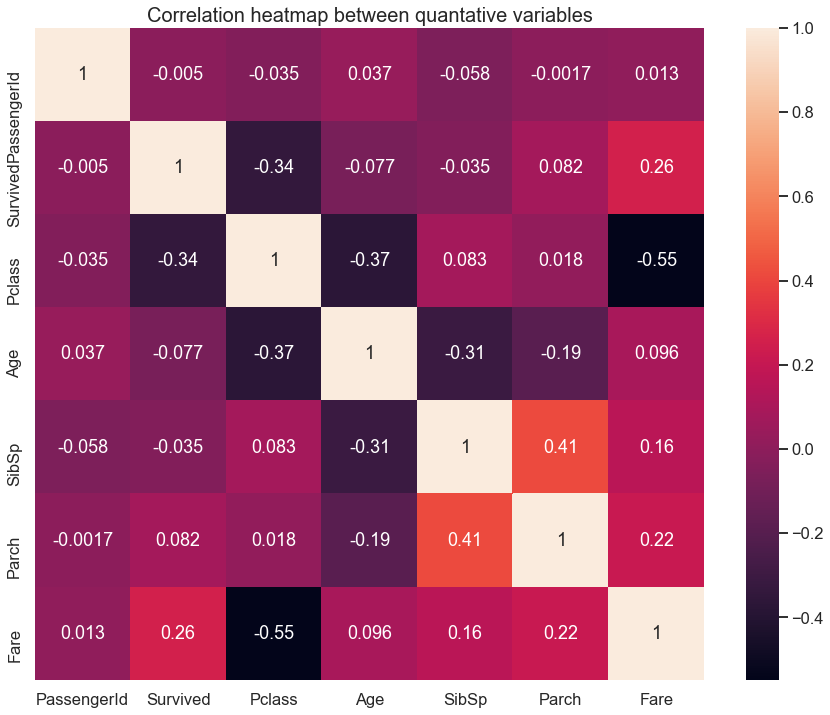

In [17]:
plt.figure(figsize=(15,12))
sns.heatmap(dftrain.corr(),annot = True);
plt.title("Correlation heatmap between quantative variables",{'fontsize':20});

# Feature Engineering

In [18]:
dfeval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [19]:
y_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [20]:
# Dropping unnecessary columns..
dftrain.drop(columns=["PassengerId","Name","Ticket"],inplace= True)

# Slicing only the first letter of the cabin column
dftrain.Cabin=dftrain.Cabin.str[0]

# Filling Nan Values in the cabin columns with unknown
dftrain.Cabin.fillna('unknown',inplace=True)

# Filling Nan Values in the Age column with the mean age
dftrain.Age.fillna(dftrain.Age.mean(),inplace=True)

# Filling Nan Values in the Embarked column with unknown
dftrain.Embarked.fillna('unknown',inplace=True)

# Moving the Survived column from the dftrain to a new DF 
y_train = dftrain.pop('Survived')

# Leaving just the Survived column in the evaluation df
y_eval= y_eval.Survived 

# Filling Nan values with the mean age from the training DF
dfeval.Age.fillna(dftrain.Age.mean(),inplace=True)

# Filling Nan Fare values with zeros 
dfeval.Fare.fillna(0,inplace=True)

# Filling Nan Cabin values with unknown
dfeval.Cabin.fillna('unknown',inplace=True)

# Model Building

In [21]:
CATEGORICAL_COLUMNS = ['Sex', 'Cabin', 'Embarked']
NUMERIC_COLUMNS = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch' ]

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='Sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Cabin', vocabulary_list=('unknown', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Embarked', vocabulary_list=('S', 'C', 'Q', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Fare', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Pclass', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SibSp', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Parch', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [22]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

In [23]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# We create a linear estimtor by passing the feature columns we created earlier

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Islam\\AppData\\Local\\Temp\\tmpv00lk3_x', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [24]:
linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

clear_output()  # clears console output
print(result['accuracy'])  # the result variable is simply a dict of stats about our model

0.9497608


# Results

The chance to survive is pretty low but there is things that could make it significantly higher.
- Being a female or a child will increase you chances.
- If you have a higher class you have more chance of surviving than a third class.
- You are more likely to survive if embark in C compare to S or Q.
- If you also travel with 1 or 2 parents or children, your survival chances are greater.